### Orbital fitting

In [252]:
from tqdm import tqdm
import numpy as np
import pandas as pd
from astropy.io import fits
import glob 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy import units as u
from astropy.table import Column, Table, join

pd.options.display.max_columns = 999
%matplotlib inline

In [ ]:
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
#sns.set_style('white')
#sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 20, "xtick.direction": 'in', "ytick.direction": 'in'})

In [253]:
path = '/Users/Sophie/git/orbit3d/'

In [85]:
file = 'HIP95319_chain001.fits'
source = file.split('_')[0]
tt, lnp, extras = [fits.open(path+file)[i].data for i in range(3)]
nsteps = 50*tt.shape[1]
beststep = np.where(lnp==lnp.max())
print(beststep)
print(tt[beststep])
print(lnp[beststep])
print(extras[beststep])

(array([90]), array([1307]))
[[ 0.8619608   0.7808231   0.0360539  28.238762    0.22626218 -0.563248
   0.71592     3.0458148   1.2701529 ]]
[-1124.1532]
[[0.06405931 0.08064644 0.16288504 2.3789432  2.739856   2.4097078
  0.10965046 1.5299045 ]]


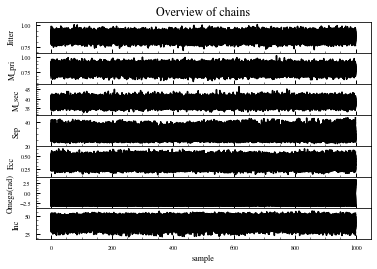

In [40]:
from __future__ import print_function
import numpy, math, sys, scipy, emcee, corner
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.optimize import minimize
from scipy.stats import binned_statistic, gamma, norm
import numpy as np
from matplotlib import rcParams

rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.weight'] = "normal"
rcParams["axes.formatter.useoffset"] = False
rcParams['xtick.major.width']=1
rcParams['xtick.major.size']=4
rcParams['xtick.minor.width']=0.5
rcParams['xtick.minor.size']=2
rcParams['xtick.direction'] = "in"
rcParams['ytick.direction'] = "in"
rcParams['ytick.major.width']=1
rcParams['ytick.major.size']=4
rcParams['ytick.minor.width']=0.5
rcParams['ytick.minor.size']=2
rcParams["savefig.dpi"] = 100
rcParams['xtick.major.pad']=5
rcParams['ytick.major.pad']=5


fig, ax = plt.subplots(nrows=7,sharex=True)
labels=['Jitter', 'M_pri', 'M_sec', 'Sep', 'Ecc', 'Omega(rad)','Inc']
burnin=1000
for i in range(7):
    for j in range(tt.shape[0]):
        if i==2:
            ax[i].plot(tt[j,burnin:,i]*1989/1.898, color='black')
        if i==0 or i==3:
            ax[i].plot(tt[j,burnin:,i], color='black')
        if i==4:
            ax[i].plot(tt[j,burnin:,i]**2 +tt[j,burnin:,5]**2, color='black')
        if i==6:
            ax[i].plot(tt[j,burnin:,i]*180/np.pi, color='black')
        if i==1:
            ax[i].plot(tt[j,burnin:,i], color='black')
        if i==5:
            ax[i].plot(np.arctan2(tt[j,burnin:,4],tt[j,burnin:,5]), color='black')
    if labels:
            ax[i].set_ylabel(labels[i],fontsize=8)
            ax[i].margins(y=0.1)
    for label in ax[i].get_yticklabels():
            label.set_fontsize(6)
            
    ax[i].set_xlabel("sample",fontsize=8)
    ax[i].minorticks_on()
    ax[0].set_title("Overview of chains",y=1.03,fontsize=12)
    for label in ax[i].get_xticklabels():
            label.set_fontsize(6)
    overview=fig.subplots_adjust(hspace=0)
    #plt.savefig('/Users/Sophie/Desktop/Gl758B_chains.png') 

In [41]:
a=tt[:,burnin:,1].flatten()
b=(tt[:,burnin:,2]*1989/1.898).flatten()
c=tt[:,burnin:,3].flatten()
d=(tt[:,burnin:,4]**2 +tt[:,burnin:,5]**2).flatten()
e=(np.arctan2(tt[:,burnin:,4],tt[:,burnin:,5])).flatten()
f=(tt[:,burnin:,6]*180/np.pi).flatten()

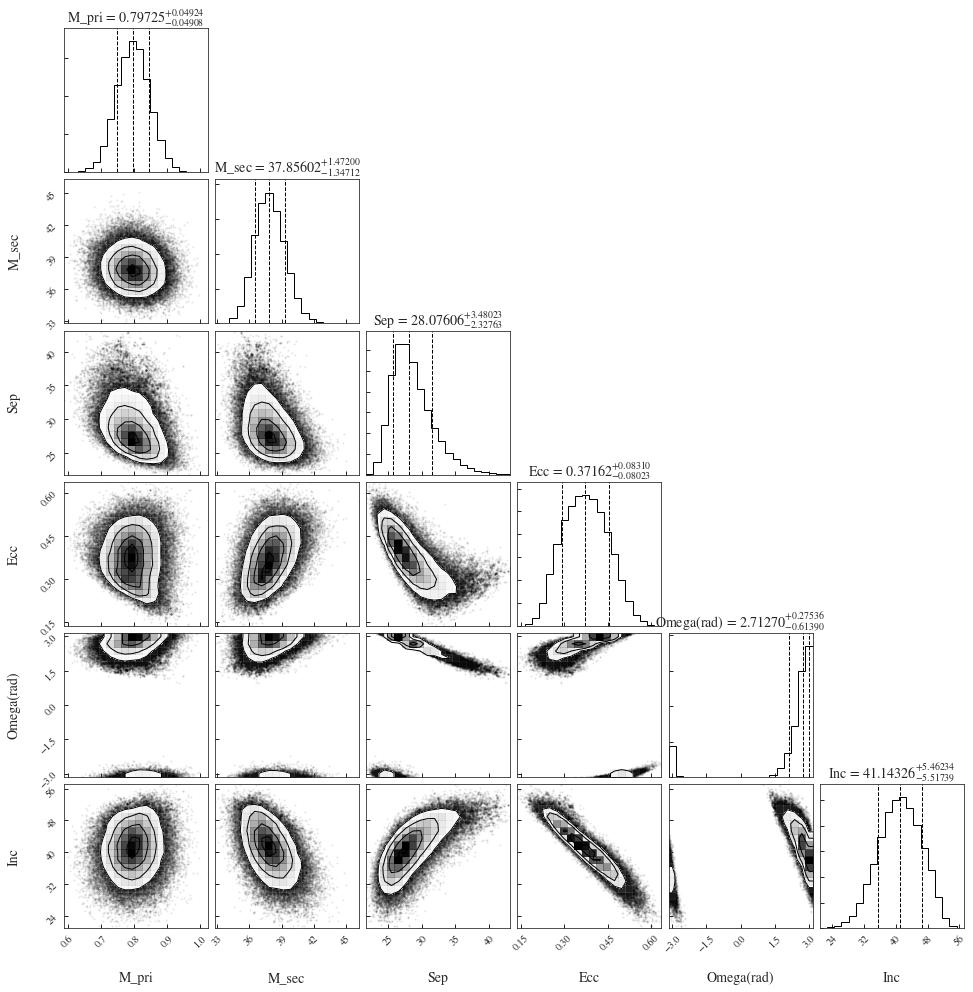

In [10]:
def plot_corner(chain,labels=labels,burnin=0,thin=1,title_fmt=".5f",**kwargs):
    labels=['M_pri', 'M_sec', 'Sep', 'Ecc', 'Omega(rad)','Inc']
    rcParams["lines.linewidth"] = 1.0
    rcParams["axes.labelpad"] = 80.0
    rcParams["xtick.labelsize"] = 10.0 
    rcParams["ytick.labelsize"] = 10.0
    chain = np.hstack([np.vstack(a),np.vstack(b),np.vstack(c),np.vstack(d),np.vstack(e),np.vstack(f)])# chain[:,burnin:,:].reshape((-1, 6))
    figure = corner.corner(chain,
                               labels=labels,
                               quantiles=[0.16, 0.5, 0.84],
                               verbose=False,
                           show_titles=True,
                               title_kwargs={"fontsize": 14},
                               hist_kwargs={"lw":1.},
                               label_kwargs={"fontsize":14},
                               xlabcord=(0.5,-0.45),
                               ylabcord=(-0.45,0.5),
                               title_fmt=title_fmt,**kwargs)
    
rcParams["lines.linewidth"] = 1.0
rcParams["axes.labelpad"] = 80.0
rcParams["xtick.labelsize"] = 12.0
rcParams["ytick.labelsize"] = 12.0
rcParams["axes.labelsize"]= 20.0

plot_corner(tt)
#plt.savefig('/Users/Sophie/Desktop/HIP85653_corner.png') 

In [42]:
RVfile = 'Gl758_RV.dat'
rvdat = np.genfromtxt(RVfile)
rvep = rvdat[:, 0]
RV = rvdat[:, 1]
RV_err = rvdat[:, 2]
nRV = rvdat.shape[0]

In [199]:
cmap = plt.cm.get_cmap("cubehelix")
cmap(1.)

(1.0, 1.0, 1.0, 1.0)

In [202]:

HIP = 95319
RVfile = 'Gl758_RV.dat'
relAstfile = 'Gl758_relAST.txt'
use_epoch_astrometry = False
Gaia_intermediate_data = '/Users/Sophie/Downloads/Gaia/'
Hip1_intermediate_data = '/Users/Sophie/hipparcosOriginalIntermediateData/'
Hip2_intermediate_data = '/Users/Sophie/Downloads/Hip2/IntermediateData/resrec/'
output_dir = './output_plotting/'


######################################################################
# Load in data
######################################################################

data = orbit.Data(HIP, RVfile, relAstfile)


ep = np.linspace(2415260.5, 2489039.5, 1000)

# reinitiate data with a custom range of epochs
data.custom_epochs(ep)
model = orbit.Model(data)

# read in mcmc chains
path = '/Users/Sophie/git/orbit3d/'
file = 'HIP95319_chain001.fits'
source = file.split('_')[0]
tt, lnp, extras = [fits.open(path+file)[i].data for i in range(3)]
nsteps = 50*tt.shape[1]
beststep = np.where(lnp==lnp.max())

Loading RV data from file Gl758_RV.dat
Loaded data from 3 RV instruments.
Loading astrometric data for 1 planet
Loaded 4 relative astrometric data points from file Gl758_relAST.txt
Loading absolute astrometry data for Hip 95319


In [213]:
sec_mass=[]
for j in range(tt.shape[0]):
    params = orbit.Params(tt[j,1000])
    
    sec_mass.append(params.msec*1989/1.898)

orbit.calc_offsets(data, params, model, i)           
dras, ddecs = model.return_dRA_dDec()
print(np.array(sec_mass).max())

41.808338019333476


Loading RV data from file Gl758_RV.dat
Loaded data from 3 RV instruments.
Loading astrometric data for 1 planet
Loaded 4 relative astrometric data points from file Gl758_relAST.txt
Loading absolute astrometry data for Hip 95319


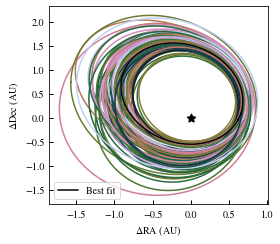

In [251]:
#!/usr/bin/env python
from __future__ import print_function
import numpy as np
import os
import time
from astropy.io import fits
import orbit
from htof.main import Astrometry
from PyAstronomy import pyasl

"""
rcParams["axes.labelpad"] = 10.0

rcParams["axes.labelsize"]= 17.0
rcParams["xtick.labelsize"] = 15.0 
rcParams["ytick.labelsize"] = 15.0"""
rcParams['figure.figsize'] = 4, 3.5


class Data:
    """
        for plotting
    """
    
    def __init__(self):
        pass

    def load(self, plot_custom, flag):
        "load in data"

        HIP = 95319
        RVfile = 'Gl758_RV.dat'
        relAstfile = 'Gl758_relAST.txt'
        use_epoch_astrometry = False
        Gaia_intermediate_data = '/Users/Sophie/Downloads/Gaia/'
        Hip1_intermediate_data = '/Users/Sophie/hipparcosOriginalIntermediateData/'
        Hip2_intermediate_data = '/Users/Sophie/Downloads/Hip2/IntermediateData/resrec/'
        output_dir = './output_plotting/'
        

        ######################################################################
        # Load in data
        ######################################################################

        data = orbit.Data(HIP, RVfile, relAstfile)
        
        if plot_custom is False:
            ep = np.linspace(2415260.5, 2415260.5 + 64380.927527555155, 1000)
        else:
            ep = np.linspace(rvep.min(), rvep.max(), 1000) 
        
        # reinitiate data with a custom range of epochs
        data.custom_epochs(ep)
        model = orbit.Model(data)
        
        # read in mcmc chains
        path = '/Users/Sophie/git/orbit3d/'
        file = 'HIP95319_chain001.fits'
        source = file.split('_')[0]
        tt, lnp, extras = [fits.open(path+file)[i].data for i in range(3)]
        nsteps = 50*tt.shape[1]
        beststep = np.where(lnp==lnp.max())
        
        
        nplanets = 1
        list_RVs = []
        
        
        #define our colormap
        cmap = plt.cm.get_cmap("cubehelix")
        
        

        for i in range(nplanets):
            for j in range(tt.shape[0]):
                file = 'HIP95319_chain001.fits'
                source = file.split('_')[0]
                tt, lnp, extras = [fits.open(path+file)[i].data for i in range(3)]
                nsteps = 50*tt.shape[1]
                beststep = np.where(lnp==lnp.max())

                params = orbit.Params(tt[j,1000])
                
                model = orbit.Model(data)
                orbit.calc_EA_RPP(data, params, model)
                orbit.calc_RV(data, params, model)
                
                #orbit.calc_offsets(data, params, model, i)
                #orbit.calc_PMs_no_epoch_astrometry(data, model)
                
                
                ####Plot RV orbits
                if flag == 'rv_orbits':
                    rv = model.return_RVs()
                    list_RVs.append(rv)
                    ep = np.linspace(2415260.5, 2489039.5, 1000)
                    #ep = np.linspace(rvep.min(), rvep.max(), 1000)
                    def julian_to_datetime(epochs):
                        rv_datetime=[]
                        for i in range(len(epochs)):
                            # Convert JD to calendar date
                            jd = epochs[i] + 18614./(24.*3600.)
                            dt = pyasl.daycnv(jd, mode='dt')
                            rv_datetime.append(dt)
                        return rv_datetime

                    ep = julian_to_datetime(ep)
                    plt.plot(ep, rv)
                    if j == beststep[0]:
                        params = orbit.Params(tt[j,1000])

                        model = orbit.Model(data)
                        orbit.calc_EA_RPP(data, params, model)
                        orbit.calc_RV(data, params, model)

                        #orbit.calc_offsets(data, params, model, i)
                        #orbit.calc_PMs_no_epoch_astrometry(data, model)
                        rv = model.return_RVs()
                        list_RVs.append(rv)

                        plt.plot(ep, rv, color='black', label = 'Best fit',zorder=10)
                        plt.legend()
                        plt.xlabel("Epoch")
                        plt.ylabel("RV (m/s)")
                        plt.tight_layout()
                        #plt.savefig("/Users/Sophie/Desktop/Gl758B_rv_orbits.png")

                  
                
                ####Plot Astrometry Orbits
                if flag == 'Ast_orbits':
                
                    period = params.per
                    ep = np.linspace(2415260.5, 2415260.5 + period, 1000)
                    data.custom_epochs(ep)
                    model = orbit.Model(data)
                    orbit.calc_EA_RPP(data, params, model)
                    orbit.calc_offsets(data, params, model, i)           
                    dras, ddecs = model.return_dRA_dDec()
                    
    
                    #params.msec
                    
                    plt.plot(dras, ddecs, c= cmap((params.msec*1989/1.898 - 34.)/(42-34.)) )#, cmap= plt.cm.cubehelix , s = 3)
                    
                    
                    if j == beststep[0]:
                        params = orbit.Params(tt[j,1000])
                        
                        model = orbit.Model(data)
                        orbit.calc_EA_RPP(data, params, model)
                        orbit.calc_RV(data, params, model)

                        plt.plot(dras, ddecs, color='black', label = 'Best fit', zorder=10)
                        #cbar = plt.colorbar(cs)
                        plt.legend()
                        plt.scatter(0,0, s=80, c='black', marker=(5, 1))
                        plt.xlabel(r"$\mathrm{\Delta RA \, \, (AU)}$")
                        plt.ylabel(r"$\mathrm{\Delta Dec \, \, (AU)}$")
                        plt.tight_layout()
                        #plt.savefig("/Users/Sophie/Desktop/Gl758B_ast_orbits.png")     
    
plotting = Data()
#plotting.load(False, 'rv_orbits')
plotting.load(False, 'Ast_orbits')

Loading RV data from file Gl758_RV.dat
Loaded data from 3 RV instruments.
Loading astrometric data for 1 planet
Loaded 4 relative astrometric data points from file Gl758_relAST.txt
Loading absolute astrometry data for Hip 95319


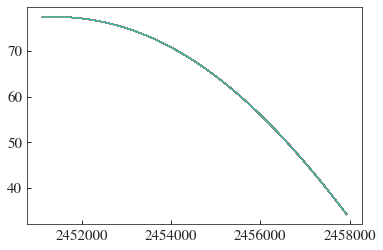

In [31]:
rv_custom, ep_custom = plotting.load(True)

In [32]:
ep_dat = julian_to_datetime(rvep)
epo_custom = julian_to_datetime(ep_custom)

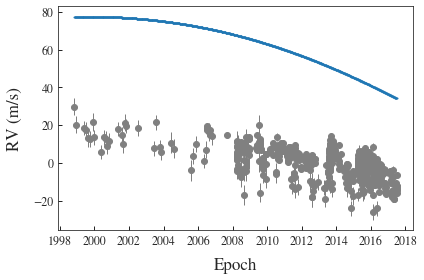

In [36]:
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

matplotlib.pyplot.plot_date(epo_custom, rv_custom[0], markersize=1)
plt.errorbar(ep_dat, RV , yerr=RV_err, fmt='o', ecolor='grey', capthick=1, color='grey')
matplotlib.pyplot.plot_date(ep_dat, RV , markersize = 3, color='grey')
plt.xlabel("Epoch")
plt.ylabel("RV (m/s)")
plt.tight_layout()
#plt.savefig("/Users/Sophie/Desktop/Gl758Brv.png")